In [4]:
# json_file = "/workspaces/arcprize2025/datas/arc-agi_training_challenges.json"
# json_file = r"C:\Users\UT00YBG3\Documents\arcprize2025\datas\arc-agi_training_challenges.json"
json_file = "/home/yann/ssd_storage/python/arcprize2025/datas/arc-agi_training_challenges.json"

In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np

with open(json_file, 'r') as file:
    data = json.load(file)

def plot_grid(grid, title=""):
    """
    Plots a single 2D grid using matplotlib.
    
    Parameters:
    - grid: List of lists of integers.
    - title: Optional title for the plot.
    """
    grid_array = np.array(grid)
    plt.figure(figsize=(2, 2))
    plt.imshow(grid_array, cmap='tab20', interpolation='nearest')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [6]:
data.keys()
list_number = list(data.keys())
n=15
example = data[list_number[n]]["train"][0]
print(example['input'])

[[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 4, 4, 1, 0, 0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 4, 4, 1, 0, 0, 1, 0, 0, 1, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 1, 0, 0, 1, 0, 0, 1, 9, 9, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 9, 9], [0, 0, 1, 0, 0, 1, 0, 0, 1, 9, 9, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 9, 9], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 8, 8, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 8, 8, 1, 0, 0], [1, 1

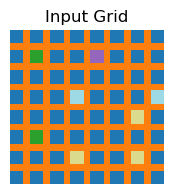

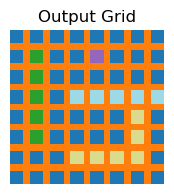

In [7]:
plot_grid(example["input"], title="Input Grid")
plot_grid(example["output"], title="Output Grid")

In [8]:
import sys
sys.path.append("/workspaces/arcprize2025/sources")

In [9]:
from tools.program_synthesizer_tool import ProgramSynthesizerTool
from core.llm import OpenRouterClient
from core.synthesis_engine import SynthesisEngine
from tools.grid_analyzer_tool import GridAnalyzerTool

analysis_tool = GridAnalyzerTool()
synth_tool = ProgramSynthesizerTool(llm=OpenRouterClient(),synthesizer=SynthesisEngine())

input_grid = example["input"]
output_grid = example["output"]


analysis = analysis_tool.run({"input_grid": input_grid, "output_grid": output_grid})
result = synth_tool._run(input_grid, output_grid, analysis)

Skipping mask-based pruning due to shape mismatch.


In [12]:
print(analysis)

The main transformations that led from the input grid to the output grid are centered around the repetition of the input grid's pattern to form a larger, more extensive grid. Here's a breakdown of the process:

1. **Input Grid Structure**:
   - The input grid consists of 2 rows and 2 columns, totaling 4 cells.
   - The values in the input grid are:
     ```
     7 9
     4 3
     ```

2. **Output Grid Structure**:
   - The output grid has a size of 6 rows by 6 columns, totaling 36 cells.

3. **Output Grid Formulation**:
   - The output grid is formed by repeating the 2x2 input pattern in both the horizontal and vertical directions to create a 6x6 grid.
   - Specifically, the 2x2 block:
     ```
     7 9
     4 3
     ```
    is repeated to fill the entire 6x6 grid. This results in a repetitive, tiled pattern:
    ```
    7 9 7 9 7 9
    4 3 4 3 4 3
    7 9 7 9 7 9
    4 3 4 3 4 3
    7 9 7 9 7 9
    4 3 4 3 4 3
    ```

4. **Features and Analysis**:
   - **Shape Features**: The input g

In [11]:
result

{'success': True,
 'result_grid': [[7, 9, 7, 9, 7, 9],
  [4, 3, 4, 3, 4, 3],
  [7, 9, 7, 9, 7, 9],
  [4, 3, 4, 3, 4, 3],
  [7, 9, 7, 9, 7, 9],
  [4, 3, 4, 3, 4, 3]],
 'program': '<core.dsl_nodes.RepeatGrid object at 0x7350238ab5f0>',
 'score': 0.6666666666666666,
 'alternatives': []}